In [1]:
# Mengimpor library re (Regular Expression) bawaan Python untuk pencocokan pola teks 
import re 
import pandas as pd  
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import pandas as pd
import nltk


## **Import Data**

In [27]:
df = pd.read_excel("snack review.xlsx")

In [28]:
df.head()

,review,score
0,"The only problem, I actually counted the amoun...",4
1,Me and my wife and my kids love them,5
2,Definitely one of the best candies you can buy...,5
3,"The price is great, but there are mostly grape...",3
4,"Box and packaging in great shape, kids love them.",5


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5248 entries, 0 to 5247
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   review  5225 non-null   object
 1   score   5248 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 82.1+ KB


In [30]:
df.isna().sum()

review    23
score      0
dtype: int64

In [31]:
df = df.dropna(subset=['review'])

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5225 entries, 0 to 5247
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   review  5225 non-null   object
 1   score   5225 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 122.5+ KB


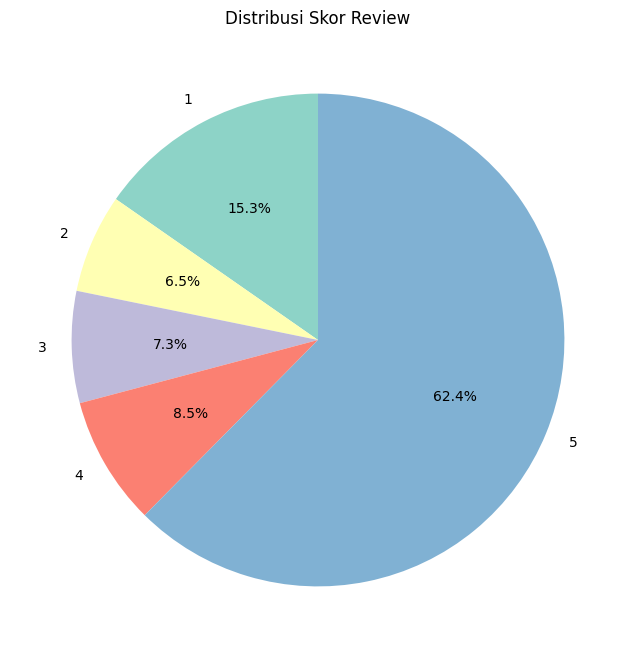

In [33]:
score_counts = df['score'].value_counts().sort_index()

# Membuat diagram pie
plt.figure(figsize=(8, 8))
plt.pie(
    score_counts,  # Menggunakan jumlah tiap kategori
    labels=score_counts.index,  # Label kategori
    autopct='%1.1f%%',  # Menampilkan persentase
    startangle=90,  # Mulai dari sudut 90 derajat
    colors=plt.cm.Set3.colors  # Warna otomatis
)
plt.title('Distribusi Skor Review')
plt.show()

## **Pre-Processing**

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5225 entries, 0 to 5247
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   review  5225 non-null   object
 1   score   5225 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 122.5+ KB


### Tahapan
More advanced preprocessing
Oleh sebab itu kita melakukan:

- normalisasi: menghindari 2 hal yang maknanya sama seperti Saya dan saya
- tokenisasi: menghindari token yang tidak diproses dengan baik misalnya halo, atau ini?

Lebih jauh lagi akan ada teknik pemrosesan seperti:

- stemming: menghindari kesamaan makna karena imbuhan seperti pukul dan memukul
- lematisasi: mengembalikan kata ke bentuk dasarnya seperti jum'at menjadi jumat

Package yang terkenal untuk stemming bahasa Indonesia: Satrawi, SpaCy
Package yang terkenal untuk lematisasi bahasa Indonesia: SpaCy

### Cleaning Emote, Tanda , dl

In [35]:
nltk.download('stopwords')
nltk.download('words')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\IQBAL\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package words to
[nltk_data]     C:\Users\IQBAL\AppData\Roaming\nltk_data...
[nltk_data]   Package words is already up-to-date!


True

In [36]:
# Fungsi menghapus emotikon
def remove_emoji(text):
    if text is not None and isinstance(text, str):
        emoji_pattern = re.compile(
            u"[\U0001F600-\U0001F64F"  # emoticons
            u"\U0001F300-\U0001F5FF"  # symbols & pictographs
            u"\U0001F680-\U0001F6FF"  # transport & map symbols
            u"\U0001F700-\U0001F77F"  # alchemical symbols
            u"\U0001F780-\U0001F7FF"  # Geometric Shapes Extended
            u"\U0001F800-\U0001F8FF"  # Supplemental Arrows-C
            u"\U0001F900-\U0001F9FF"  # Supplemental Symbols and Pictographs
            u"\U0001FA00-\U0001FA6F"  # Chess Symbols
            u"\U0001FA70-\U0001FAFF"  # Symbols and Pictographs Extended-A
            u"\U0001FC00-\U0001FCFF"  # Additional emoticons
            u"\U0001F1E0-\U0001F1FF"  # flags
            "]+", flags=re.UNICODE
        )
        return emoji_pattern.sub(r'', text)
    else:
        return text

# Fungsi untuk menghapus URL
def remove_URL(text):
    if text is not None and isinstance(text, str):
        url = re.compile(r'https?://\S+|www\.\S+')
        return url.sub(r'', text)
    else:
        return text

# Fungsi untuk menghapus HTML
def remove_html(text):
    if text is not None and isinstance(text, str):
        html = re.compile(r'<.*?>')
        return html.sub(r'', text)
    else:
        return text

# Fungsi untuk menghapus simbol
def remove_symbols(text):
    if text is not None and isinstance(text, str):
        text = re.sub(r'[^a-zA-Z0-9\s]', ' ', text)
    return text

def remove_numbers(text):
    if text is not None and isinstance(text, str):
        text = re.sub(r'\d','', text)
    return text

def clean_repeated_chars(text):
    """Menghapus huruf berulang lebih dari dua kali dalam kata"""
    return re.sub(r'(\w)\1{2,}', r'\1', text)

import re
import ftfy

def preprocess_text(text):
    # Fix encoding error
    text = ftfy.fix_text(text)
    # Hapus URL
    text = re.sub(r"http\S+|www\S+", "[URL]", text)
    # Hapus HTML tags
    text = re.sub(r"<.*?>", "", text)
    # Hapus spasi berlebih
    text = re.sub(r"\s+", " ", text).strip()
    return text



In [37]:
df['cleaning'] = df['review'].apply(remove_emoji)
df['cleaning'] = df['cleaning'].apply(remove_URL)
df['cleaning'] = df['cleaning'].apply(remove_html)
df['cleaning'] = df['cleaning'].apply(remove_symbols)
df['cleaning'] = df['cleaning'].apply(remove_numbers)
df['cleaning'] = df['cleaning'].str.lower()
df["cleaning"] = df["cleaning"].apply(clean_repeated_chars)
df["cleaning"] = df["cleaning"].apply(preprocess_text)
df.head()

,review,score,cleaning
0,"The only problem, I actually counted the amoun...",4,the only problem i actually counted the amount...
1,Me and my wife and my kids love them,5,me and my wife and my kids love them
2,Definitely one of the best candies you can buy...,5,definitely one of the best candies you can buy...
3,"The price is great, but there are mostly grape...",3,the price is great but there are mostly grape ...
4,"Box and packaging in great shape, kids love them.",5,box and packaging in great shape kids love them


In [38]:
df.to_csv("hasil_cleaning_review1.csv", index=False)

## **Labelling Data**

In [2]:
df = pd.read_csv("hasil_cleaning_review1.csv")
df

,review,score,cleaning
0,"The only problem, I actually counted the amoun...",4,the only problem i actually counted the amount...
1,Me and my wife and my kids love them,5,me and my wife and my kids love them
2,Definitely one of the best candies you can buy...,5,definitely one of the best candies you can buy...
3,"The price is great, but there are mostly grape...",3,the price is great but there are mostly grape ...
4,"Box and packaging in great shape, kids love them.",5,box and packaging in great shape kids love them
...,...,...,...
5220,Perfect snack in the afternoon,5,perfect snack in the afternoon
5221,Poor & misleading variety for a 12 pack. Was ...,2,poor misleading variety for a pack was expecti...
5222,"The flavours are fantastic, coconut is the best.",5,the flavours are fantastic coconut is the best
5223,"Requires much chewing, but an adequate meal su...",3,requires much chewing but an adequate meal sub...


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5225 entries, 0 to 5224
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   review    5225 non-null   object
 1   score     5225 non-null   int64 
 2   cleaning  5211 non-null   object
dtypes: int64(1), object(2)
memory usage: 122.6+ KB


In [4]:
# Tambahkan kolom hasil sentiment jika belum ada
if "sentiment" not in df.columns:
    df["sentiment"] = None


In [5]:
import json
from transformers import pipeline

In [6]:
texts = df["cleaning"].astype(str).tolist()

### Model RoBERTa dari Hugging Face

In [85]:
from transformers import AutoTokenizer, TFAutoModelForSequenceClassification, pipeline
import json

# 1. Load tokenizer & model (TensorFlow)
model_name = "cardiffnlp/twitter-roberta-base-sentiment"

tokenizer = AutoTokenizer.from_pretrained(model_name)
model = TFAutoModelForSequenceClassification.from_pretrained(model_name)

# 2. Buat pipeline sentiment-analysis dengan TensorFlow backend
sentiment_pipeline = pipeline(
    "sentiment-analysis",
    model=model,
    tokenizer=tokenizer,
    framework="tf"  # pastikan pakai TensorFlow
)

# 3. Analisis batch
results = []
batch_size = 32
for i in range(0, len(texts), batch_size):
    batch_texts = texts[i:i+batch_size]
    preds = sentiment_pipeline(batch_texts)

    for text, pred in zip(batch_texts, preds):
        # Mapping label sesuai dokumentasi model
        if pred["label"] == "LABEL_0":
            mapped = "NEGATIVE"
        elif pred["label"] == "LABEL_1":
            mapped = "NEUTRAL"
        elif pred["label"] == "LABEL_2":
            mapped = "POSITIVE"
        else:
            mapped = pred["label"]

        results.append({
            "text": text,
            "raw_label": pred["label"],
            "mapped_label": mapped,
            "score": float(pred["score"])
        })

# 4. Simpan ke JSON
with open("sentiment_results.json", "w", encoding="utf-8") as f:
    json.dump(results, f, ensure_ascii=False, indent=2)


vocab.json: 0.00B [00:00, ?B/s]

merges.txt: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/150 [00:00<?, ?B/s]

TensorFlow and JAX classes are deprecated and will be removed in Transformers v5. We recommend migrating to PyTorch classes or pinning your version of Transformers.
All model checkpoint layers were used when initializing TFRobertaForSequenceClassification.

All the layers of TFRobertaForSequenceClassification were initialized from the model checkpoint at cardiffnlp/twitter-roberta-base-sentiment.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFRobertaForSequenceClassification for predictions without further training.
TensorFlow and JAX classes are deprecated and will be removed in Transformers v5. We recommend migrating to PyTorch classes or pinning your version of Transformers.
Device set to use 0
TensorFlow and JAX classes are deprecated and will be removed in Transformers v5. We recommend migrating to PyTorch classes or pinning your version of Transformers.


In [86]:
# 5. Simpan ke Excel
df_out = pd.DataFrame(results)
df_out.to_excel("sentiment_results.xlsx", index=False)

print("✅ Analisis selesai! Hasil disimpan di sentiment_results.json dan sentiment_results.xlsx")

✅ Analisis selesai! Hasil disimpan di sentiment_results.json dan sentiment_results.xlsx


In [89]:
df_out

,text,raw_label,mapped_label,score
0,the only problem i actually counted the amount...,LABEL_1,NEUTRAL,0.525420
1,me and my wife and my kids love them,LABEL_2,POSITIVE,0.974671
2,definitely one of the best candies you can buy...,LABEL_2,POSITIVE,0.981386
3,the price is great but there are mostly grape ...,LABEL_2,POSITIVE,0.959348
4,box and packaging in great shape kids love them,LABEL_2,POSITIVE,0.970671
...,...,...,...,...
5220,perfect snack in the afternoon,LABEL_2,POSITIVE,0.935422
5221,poor misleading variety for a pack was expecti...,LABEL_0,NEGATIVE,0.520421
5222,the flavours are fantastic coconut is the best,LABEL_2,POSITIVE,0.988627
5223,requires much chewing but an adequate meal sub...,LABEL_1,NEUTRAL,0.550969


In [92]:
df_hasil['mapped_label'].value_counts()

mapped_label
POSITIVE    3260
NEGATIVE    1198
NEUTRAL      767
Name: count, dtype: int64

In [96]:
def map_score(score):
    if score in [1, 2]:
        return "Negative"
    elif score == 3:
        return "Neutral"
    elif score in [4, 5]:
        return "Positive"
    else:
        return "UNCERTAIN"

# Terapkan ke setiap nilai dengan .apply()
df['score_label'] = df['score'].apply(map_score)

In [98]:
# Menumpuk kolom
df_fix = pd.concat([df, df_out], axis=1)
df_fix.head()

,review,score,cleaning,sentiment,score_label,text,raw_label,mapped_label,score
0,"The only problem, I actually counted the amoun...",4,the only problem i actually counted the amount...,"{""label"": null, ""score"": null}",Positive,the only problem i actually counted the amount...,LABEL_1,NEUTRAL,0.525420
1,Me and my wife and my kids love them,5,me and my wife and my kids love them,"{""label"": null, ""score"": null}",Positive,me and my wife and my kids love them,LABEL_2,POSITIVE,0.974671
2,Definitely one of the best candies you can buy...,5,definitely one of the best candies you can buy...,"{""label"": null, ""score"": null}",Positive,definitely one of the best candies you can buy...,LABEL_2,POSITIVE,0.981386
3,"The price is great, but there are mostly grape...",3,the price is great but there are mostly grape ...,"{""label"": null, ""score"": null}",Neutral,the price is great but there are mostly grape ...,LABEL_2,POSITIVE,0.959348
4,"Box and packaging in great shape, kids love them.",5,box and packaging in great shape kids love them,"{""label"": null, ""score"": null}",Positive,box and packaging in great shape kids love them,LABEL_2,POSITIVE,0.970671


In [103]:
df_fix.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5225 entries, 0 to 5224
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   review        5225 non-null   object 
 1   score         5225 non-null   int64  
 2   cleaning      5211 non-null   object 
 3   sentiment     6 non-null      object 
 4   score_label   5225 non-null   object 
 5   text          5225 non-null   object 
 6   raw_label     5225 non-null   object 
 7   mapped_label  5225 non-null   object 
 8   score         5225 non-null   float64
 9   label_text    5225 non-null   object 
dtypes: float64(1), int64(1), object(8)
memory usage: 408.3+ KB


In [104]:
df_fix.head()

,review,score,cleaning,sentiment,score_label,text,raw_label,mapped_label,score,label_text
0,"The only problem, I actually counted the amoun...",4,the only problem i actually counted the amount...,"{""label"": null, ""score"": null}",Positive,the only problem i actually counted the amount...,LABEL_1,Neutral,0.525420,Neutral
1,Me and my wife and my kids love them,5,me and my wife and my kids love them,"{""label"": null, ""score"": null}",Positive,me and my wife and my kids love them,LABEL_2,Positive,0.974671,Positive
2,Definitely one of the best candies you can buy...,5,definitely one of the best candies you can buy...,"{""label"": null, ""score"": null}",Positive,definitely one of the best candies you can buy...,LABEL_2,Positive,0.981386,Positive
3,"The price is great, but there are mostly grape...",3,the price is great but there are mostly grape ...,"{""label"": null, ""score"": null}",Neutral,the price is great but there are mostly grape ...,LABEL_2,Positive,0.959348,Positive
4,"Box and packaging in great shape, kids love them.",5,box and packaging in great shape kids love them,"{""label"": null, ""score"": null}",Positive,box and packaging in great shape kids love them,LABEL_2,Positive,0.970671,Positive


In [105]:
df_fix.to_csv("hasil_labelling.csv", index=False)

## **Analisis & Feature Engineering**

In [6]:
df_fix = pd.read_csv("hasil_labelling.csv")
df_fix.head()

,review,score,cleaning,sentiment,score_label,text,raw_label,mapped_label,score.1,label_text
0,"The only problem, I actually counted the amoun...",4,the only problem i actually counted the amount...,"{""label"": null, ""score"": null}",Positive,the only problem i actually counted the amount...,LABEL_1,Neutral,0.525420,Neutral
1,Me and my wife and my kids love them,5,me and my wife and my kids love them,"{""label"": null, ""score"": null}",Positive,me and my wife and my kids love them,LABEL_2,Positive,0.974671,Positive
2,Definitely one of the best candies you can buy...,5,definitely one of the best candies you can buy...,"{""label"": null, ""score"": null}",Positive,definitely one of the best candies you can buy...,LABEL_2,Positive,0.981386,Positive
3,"The price is great, but there are mostly grape...",3,the price is great but there are mostly grape ...,"{""label"": null, ""score"": null}",Neutral,the price is great but there are mostly grape ...,LABEL_2,Positive,0.959348,Positive
4,"Box and packaging in great shape, kids love them.",5,box and packaging in great shape kids love them,"{""label"": null, ""score"": null}",Positive,box and packaging in great shape kids love them,LABEL_2,Positive,0.970671,Positive


In [7]:
#Menandai Status Miss Infomation
df_fix["missinform"] = df_fix["label_text"] != df_fix["score_label"]

In [8]:
df_fix.head()

,review,score,cleaning,sentiment,score_label,text,raw_label,mapped_label,score.1,label_text,missinform
0,"The only problem, I actually counted the amoun...",4,the only problem i actually counted the amount...,"{""label"": null, ""score"": null}",Positive,the only problem i actually counted the amount...,LABEL_1,Neutral,0.525420,Neutral,True
1,Me and my wife and my kids love them,5,me and my wife and my kids love them,"{""label"": null, ""score"": null}",Positive,me and my wife and my kids love them,LABEL_2,Positive,0.974671,Positive,False
2,Definitely one of the best candies you can buy...,5,definitely one of the best candies you can buy...,"{""label"": null, ""score"": null}",Positive,definitely one of the best candies you can buy...,LABEL_2,Positive,0.981386,Positive,False
3,"The price is great, but there are mostly grape...",3,the price is great but there are mostly grape ...,"{""label"": null, ""score"": null}",Neutral,the price is great but there are mostly grape ...,LABEL_2,Positive,0.959348,Positive,True
4,"Box and packaging in great shape, kids love them.",5,box and packaging in great shape kids love them,"{""label"": null, ""score"": null}",Positive,box and packaging in great shape kids love them,LABEL_2,Positive,0.970671,Positive,False


#### **Data untuk Klasifikasi**

In [9]:
df_fix["final_label"] = df_fix["label_text"]

# 2. Data untuk klasifikasi → pakai final_label
data_final = df_fix[["text", "final_label"]]

In [10]:
data_final.to_csv("data_klasifikasi.csv")

In [59]:
data_final = pd.read_csv("data_klasifikasi.csv")

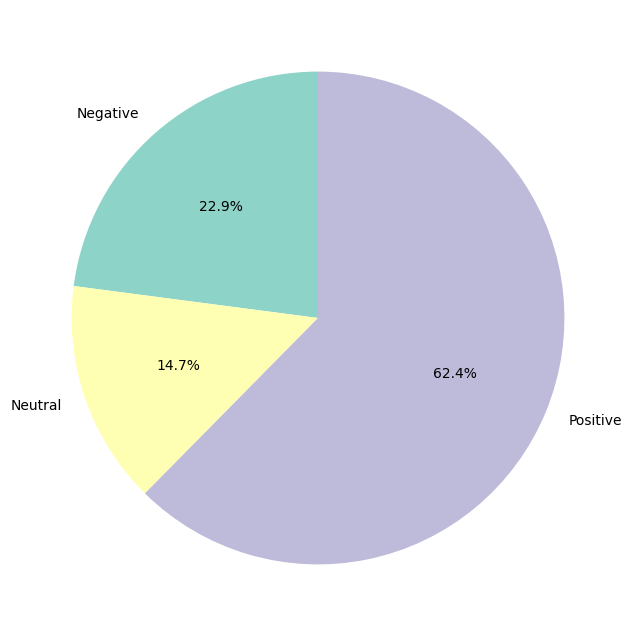

In [60]:
sentimen_counts = data_final['final_label'].value_counts().sort_index()

# Membuat diagram pie
plt.figure(figsize=(8, 8))
plt.pie(
    sentimen_counts,  # Menggunakan jumlah tiap kategori
    labels=sentimen_counts.index,  # Label kategori
    autopct='%1.1f%%',  # Menampilkan persentase
    startangle=90,  # Mulai dari sudut 90 derajat
    colors=plt.cm.Set3.colors  # Warna otomatis
)
plt.show()

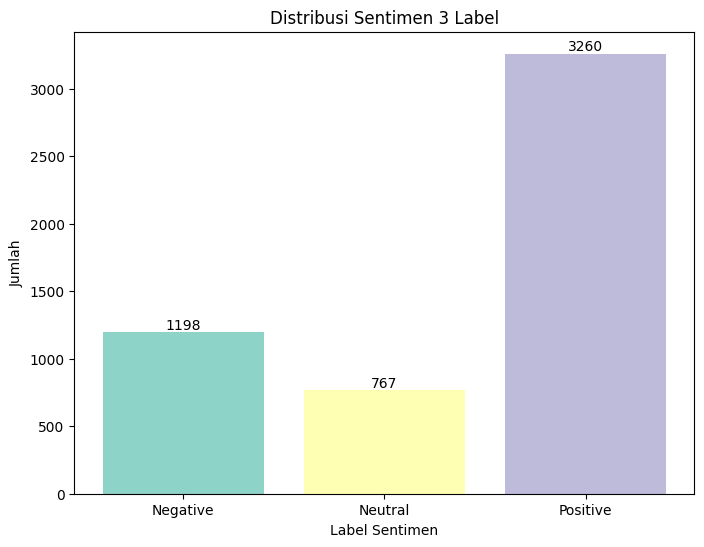

In [61]:
import matplotlib.pyplot as plt

# Hitung distribusi label
sentimen_counts = data_final['final_label'].value_counts().sort_index()

# Membuat diagram batang
plt.figure(figsize=(8,6))
bars = plt.bar(sentimen_counts.index, sentimen_counts.values, color=plt.cm.Set3.colors)

# Tambahkan label jumlah di atas batang
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 1, str(yval), ha='center', va='bottom', fontsize=10)

plt.title("Distribusi Sentimen 3 Label")
plt.xlabel("Label Sentimen")
plt.ylabel("Jumlah")
plt.show()


#### **Data yang Miss Information**

In [12]:
df_fix['missinform'].value_counts()

missinform
False    3972
True     1253
Name: count, dtype: int64

In [20]:
missinform_data = df_fix[df_fix["missinform"] == True]

In [22]:
missinform_data = missinform_data.drop(["mapped_label", "final_label","sentiment","raw_label","score.1"], axis=1)
missinform_data.head()

,review,score,cleaning,score_label,text,label_text,missinform
0,"The only problem, I actually counted the amoun...",4,the only problem i actually counted the amount...,Positive,the only problem i actually counted the amount...,Neutral,True
3,"The price is great, but there are mostly grape...",3,the price is great but there are mostly grape ...,Neutral,the price is great but there are mostly grape ...,Positive,True
8,Satisfies my craving to bite people,5,satisfies my craving to bite people,Positive,satisfies my craving to bite people,Neutral,True
14,Grab and go for the summer ball games.,5,grab and go for the summer ball games,Positive,grab and go for the summer ball games,Neutral,True
24,I ordered these in mid-May for a graduation pa...,1,i ordered these in mid may for a graduation pa...,Negative,i ordered these in mid may for a graduation pa...,Neutral,True


In [23]:
missinform_data.to_csv("missinform_data.csv")

In [26]:
total = len(df_fix)
total_miss = df_fix["missinform"].sum()
pct_miss = total_miss / total * 100

print(f"Total rows: {total}")
print(f"Total missinform: {total_miss} ({pct_miss:.2f}%)\n")

Total rows: 5225
Total missinform: 1253 (23.98%)



In [30]:
print("\nContoh 20 baris missinform (text positif tapi skor rendah / mismatch):")
miss_examples = df_fix[df_fix["missinform"]].copy()
# Optional: fokus yang text_label == POSITIVE & score_label != POSITIVE (sesuai definisi)
miss_examples = miss_examples[(miss_examples["label_text"].str.upper() == "POSITIVE") & (miss_examples["score_label"].str.upper() != "POSITIVE")]
print(miss_examples[["text", "label_text", "score", "score_label"]].head(10).to_string(index=False))


Contoh 20 baris missinform (text positif tapi skor rendah / mismatch):
                                                                                                                                                                                                                                                                                                    text label_text  score score_label
                                                                                                                                                                                                                             the price is great but there are mostly grape and orange flavors in the box   Positive      3     Neutral
i have ordered this popcorn a few times i enjoy the flavor not to bad on carbs either the low rating is due to the dollar price increase i understand prices will go up but not by bucks overnight i will not order from this seller again unless they decide to go back down on t

Text(0.5, 1.0, 'Distribusi label dari teks')

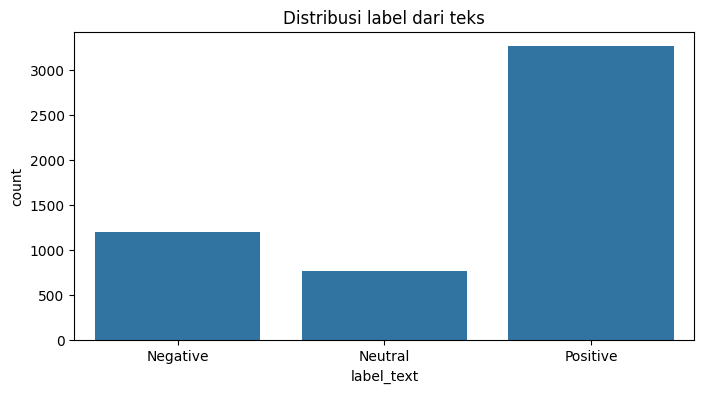

In [33]:
plt.figure(figsize=(8,4))
sns.countplot(x="label_text", data=df_fix, order=sorted(df_fix["label_text"].unique()))
plt.title("Distribusi label dari teks")


Text(0, 0.5, 'Jumlah missinform (True count)')

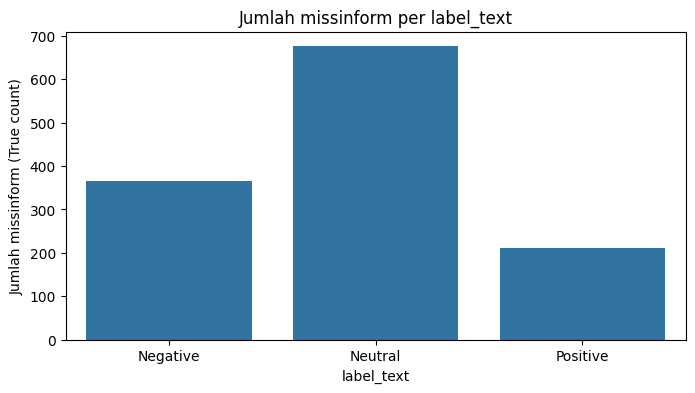

In [34]:
plt.figure(figsize=(8,4))
sns.barplot(x="label_text", y="missinform", data=df_fix.groupby("label_text")["missinform"].sum().reset_index(), order=sorted(df_fix["label_text"].unique()))
plt.title("Jumlah missinform per label_text")
plt.ylabel("Jumlah missinform (True count)")

Text(0, 0.5, 'Jumlah missinform (True count)')

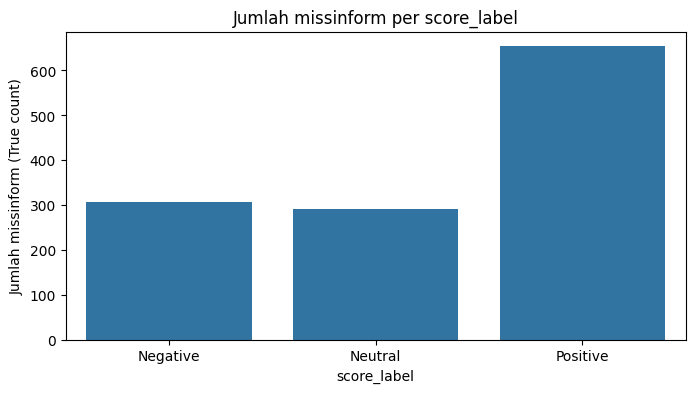

In [37]:
plt.figure(figsize=(8,4))
sns.barplot(x="score_label", y="missinform", data=df_fix.groupby("score_label")["missinform"].sum().reset_index(), order=sorted(df_fix["score_label"].unique()))
plt.title("Jumlah missinform per score_label")
plt.ylabel("Jumlah missinform (True count)")

In [38]:
import datetime

## **Visualitation Word Cloud**

In [3]:
df_final = pd.read_csv("data_klasifikasi.csv")
df_final

,text,final_label
0,the only problem i actually counted the amount...,Neutral
1,me and my wife and my kids love them,Positive
2,definitely one of the best candies you can buy...,Positive
3,the price is great but there are mostly grape ...,Positive
4,box and packaging in great shape kids love them,Positive
...,...,...
5220,perfect snack in the afternoon,Positive
5221,poor misleading variety for a pack was expecti...,Negative
5222,the flavours are fantastic coconut is the best,Positive
5223,requires much chewing but an adequate meal sub...,Neutral


#### **Preprocessing lebih dalam**

In [4]:
def tokenize(text):
    if isinstance(text, str):
        return text.split()
    else:
        return []  # jika bukan string, kembalikan list kosong

df_final['tokenized'] = df_final['text'].apply(tokenize)
df_final.head(10)

,text,final_label,tokenized
0,the only problem i actually counted the amount...,Neutral,"[the, only, problem, i, actually, counted, the..."
1,me and my wife and my kids love them,Positive,"[me, and, my, wife, and, my, kids, love, them]"
2,definitely one of the best candies you can buy...,Positive,"[definitely, one, of, the, best, candies, you,..."
3,the price is great but there are mostly grape ...,Positive,"[the, price, is, great, but, there, are, mostl..."
4,box and packaging in great shape kids love them,Positive,"[box, and, packaging, in, great, shape, kids, ..."
5,good price,Positive,"[good, price]"
6,i bought these for my grandson who lives a few...,Positive,"[i, bought, these, for, my, grandson, who, liv..."
7,i wasn t just a regular mom after i made this ...,Positive,"[i, wasn, t, just, a, regular, mom, after, i, ..."
8,satisfies my craving to bite people,Neutral,"[satisfies, my, craving, to, bite, people]"
9,this product was perfect to provide treats for...,Positive,"[this, product, was, perfect, to, provide, tre..."


In [5]:
import nltk
import re
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\IQBAL\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [6]:
# Stopwords bahasa Inggris
stop_words = stopwords.words('english')

# Bisa tambah stopwords custom
custom_stopwords = {'yeah', 'ok'}  # contoh tambahan
all_stopwords = set(stop_words).union(custom_stopwords)

# Kalau ada kata yang ingin tetap dipertahankan, buang dari stopwords
all_stopwords.discard('good')

# Fungsi hapus stopwords
def remove_stopword(tokens):
    return [word for word in tokens if word.lower() not in all_stopwords]

df_final['stopword_remove'] = df_final['tokenized'].apply(lambda x: remove_stopword(x))

In [19]:
from nltk.stem import PorterStemmer

# Membuat objek stemmer
stemmer = PorterStemmer()

# Fungsi untuk stemming teks
def stem_text(text):
    if isinstance(text, list):  # kalau input berupa token list
        return [stemmer.stem(word) for word in text]
    elif isinstance(text, str):  # kalau input berupa string
        return ' '.join([stemmer.stem(word) for word in text.split()])
    else:
        return ""

# Menerapkan stemming pada kolom 'stopword_remove'
df_final['steming_data'] = df_final['stopword_remove'].apply(stem_text)

df_final.head()

,text,final_label,tokenized,stopword_remove,steming_data
0,the only problem i actually counted the amount...,Neutral,"[the, only, problem, i, actually, counted, the...","[problem, actually, counted, amount, box, box]","[problem, actual, count, amount, box, box]"
1,me and my wife and my kids love them,Positive,"[me, and, my, wife, and, my, kids, love, them]","[wife, kids, love]","[wife, kid, love]"
2,definitely one of the best candies you can buy...,Positive,"[definitely, one, of, the, best, candies, you,...","[definitely, one, best, candies, buy, selling,...","[definit, one, best, candi, buy, sell, school,..."
3,the price is great but there are mostly grape ...,Positive,"[the, price, is, great, but, there, are, mostl...","[price, great, mostly, grape, orange, flavors,...","[price, great, mostli, grape, orang, flavor, box]"
4,box and packaging in great shape kids love them,Positive,"[box, and, packaging, in, great, shape, kids, ...","[box, packaging, great, shape, kids, love]","[box, packag, great, shape, kid, love]"


In [20]:
df_final.to_csv("data_final_klasifikasi.csv")

In [7]:
df_final

,text,final_label,tokenized,stopword_remove
0,the only problem i actually counted the amount...,Neutral,"[the, only, problem, i, actually, counted, the...","[problem, actually, counted, amount, box, box]"
1,me and my wife and my kids love them,Positive,"[me, and, my, wife, and, my, kids, love, them]","[wife, kids, love]"
2,definitely one of the best candies you can buy...,Positive,"[definitely, one, of, the, best, candies, you,...","[definitely, one, best, candies, buy, selling,..."
3,the price is great but there are mostly grape ...,Positive,"[the, price, is, great, but, there, are, mostl...","[price, great, mostly, grape, orange, flavors,..."
4,box and packaging in great shape kids love them,Positive,"[box, and, packaging, in, great, shape, kids, ...","[box, packaging, great, shape, kids, love]"
...,...,...,...,...
5220,perfect snack in the afternoon,Positive,"[perfect, snack, in, the, afternoon]","[perfect, snack, afternoon]"
5221,poor misleading variety for a pack was expecti...,Negative,"[poor, misleading, variety, for, a, pack, was,...","[poor, misleading, variety, pack, expecting, b..."
5222,the flavours are fantastic coconut is the best,Positive,"[the, flavours, are, fantastic, coconut, is, t...","[flavours, fantastic, coconut, best]"
5223,requires much chewing but an adequate meal sub...,Neutral,"[requires, much, chewing, but, an, adequate, m...","[requires, much, chewing, adequate, meal, subs..."


In [8]:
def generate_wordcloud(data, ngram=(1,1), title='Word Cloud'):
    vectorizer = CountVectorizer(ngram_range=ngram)
    X = vectorizer.fit_transform(data)

    sum_words = X.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vectorizer.vocabulary_.items()]
    words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)

    word_freq_dict = dict(words_freq[:50])  # ambil 50 paling sering

    wordcloud = WordCloud(width=800, height=400, background_color='white',
                          colormap='viridis').generate_from_frequencies(word_freq_dict)

    plt.figure(figsize=(12,6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(title, fontsize=16)
    plt.show()

### *Uni-Gram*

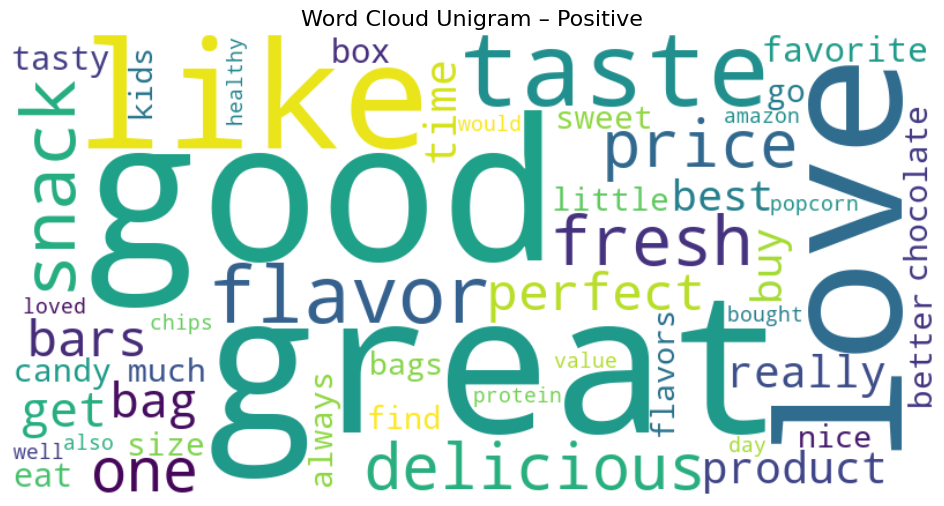

In [9]:
positif_reviews_text = df_final[df_final['final_label'] == 'Positive']['stopword_remove'].astype(str)
positif_reviews_text = positif_reviews_text.apply(lambda x: " ".join(x) if isinstance(x, list) else x)
generate_wordcloud(positif_reviews_text, ngram=(1,1), title='Word Cloud Unigram – Positive')


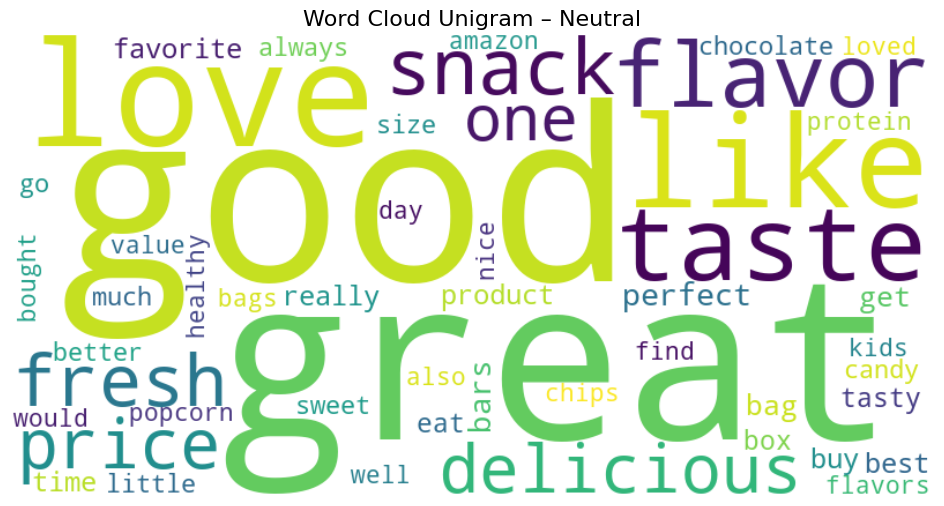

In [10]:
netral_reviews_text = df_final[df_final['final_label'] == 'Neutral']['stopword_remove'].astype(str)
netral_reviews_text = positif_reviews_text.apply(lambda x: " ".join(x) if isinstance(x, list) else x)
generate_wordcloud(positif_reviews_text, ngram=(1,1), title='Word Cloud Unigram – Neutral')

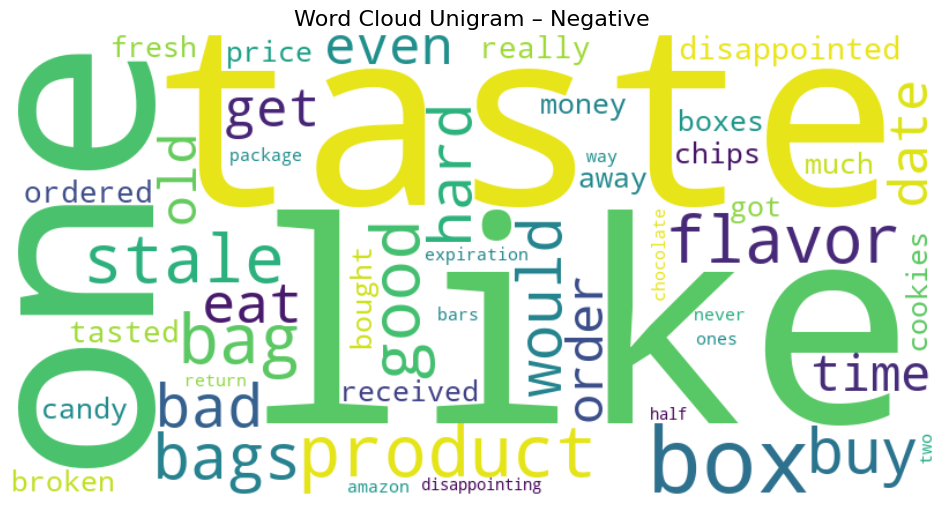

In [11]:
negative_reviews_text = df_final[df_final['final_label'] == 'Negative']['stopword_remove']
negative_reviews_text = negative_reviews_text.apply(lambda x: " ".join(x) if isinstance(x, list) else str(x))
generate_wordcloud(negative_reviews_text, ngram=(1,1), title='Word Cloud Unigram – Negative')

### *Bi-Gram*

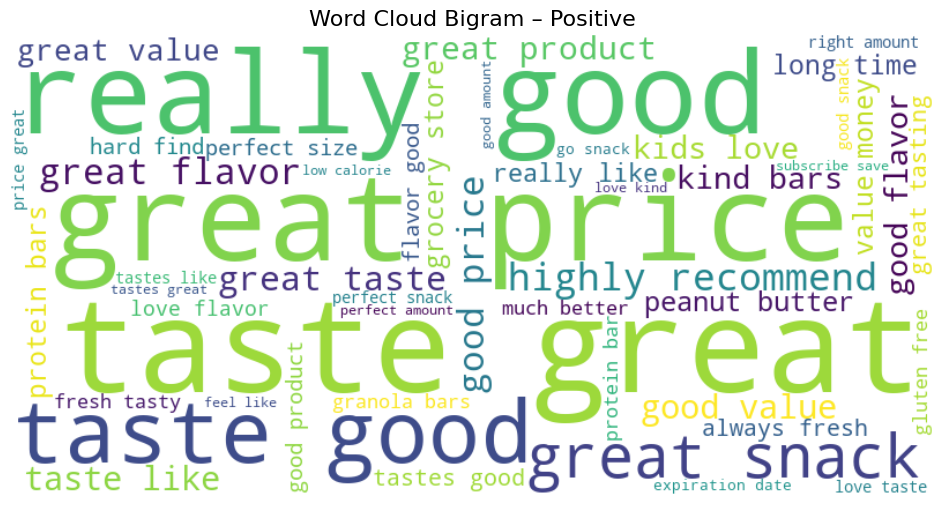

In [16]:
generate_wordcloud(positif_reviews_text, ngram=(2,2), title='Word Cloud Bigram – Positive')

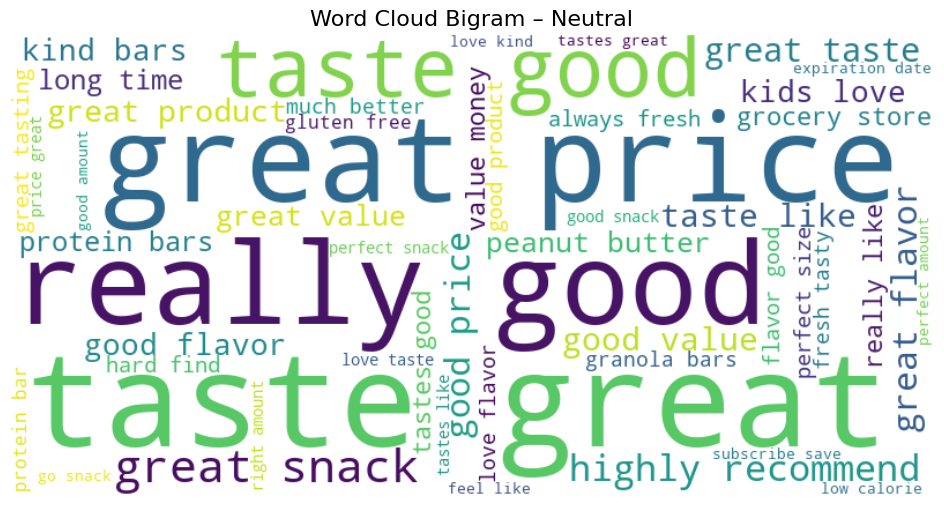

In [17]:
generate_wordcloud(netral_reviews_text, ngram=(2,2), title='Word Cloud Bigram – Neutral')

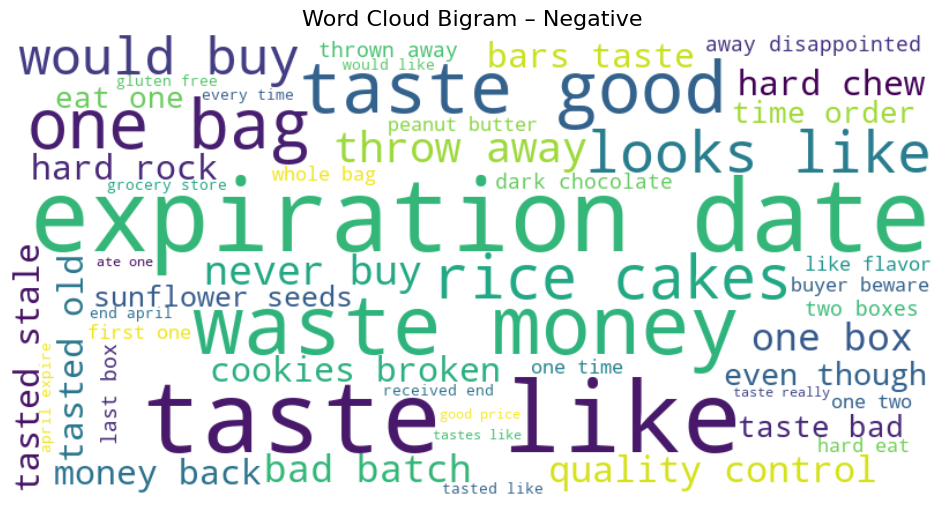

In [18]:
generate_wordcloud(negative_reviews_text, ngram=(2,2), title='Word Cloud Bigram – Negative')

## **Modelling**

### TFIDF

In [21]:
data = pd.read_csv("data_final_klasifikasi.csv")
data

,Unnamed: 0,text,final_label,tokenized,stopword_remove,steming_data
0,0,the only problem i actually counted the amount...,Neutral,"['the', 'only', 'problem', 'i', 'actually', 'c...","['problem', 'actually', 'counted', 'amount', '...","['problem', 'actual', 'count', 'amount', 'box'..."
1,1,me and my wife and my kids love them,Positive,"['me', 'and', 'my', 'wife', 'and', 'my', 'kids...","['wife', 'kids', 'love']","['wife', 'kid', 'love']"
2,2,definitely one of the best candies you can buy...,Positive,"['definitely', 'one', 'of', 'the', 'best', 'ca...","['definitely', 'one', 'best', 'candies', 'buy'...","['definit', 'one', 'best', 'candi', 'buy', 'se..."
3,3,the price is great but there are mostly grape ...,Positive,"['the', 'price', 'is', 'great', 'but', 'there'...","['price', 'great', 'mostly', 'grape', 'orange'...","['price', 'great', 'mostli', 'grape', 'orang',..."
4,4,box and packaging in great shape kids love them,Positive,"['box', 'and', 'packaging', 'in', 'great', 'sh...","['box', 'packaging', 'great', 'shape', 'kids',...","['box', 'packag', 'great', 'shape', 'kid', 'lo..."
...,...,...,...,...,...,...
5220,5220,perfect snack in the afternoon,Positive,"['perfect', 'snack', 'in', 'the', 'afternoon']","['perfect', 'snack', 'afternoon']","['perfect', 'snack', 'afternoon']"
5221,5221,poor misleading variety for a pack was expecti...,Negative,"['poor', 'misleading', 'variety', 'for', 'a', ...","['poor', 'misleading', 'variety', 'pack', 'exp...","['poor', 'mislead', 'varieti', 'pack', 'expect..."
5222,5222,the flavours are fantastic coconut is the best,Positive,"['the', 'flavours', 'are', 'fantastic', 'cocon...","['flavours', 'fantastic', 'coconut', 'best']","['flavour', 'fantast', 'coconut', 'best']"
5223,5223,requires much chewing but an adequate meal sub...,Neutral,"['requires', 'much', 'chewing', 'but', 'an', '...","['requires', 'much', 'chewing', 'adequate', 'm...","['requir', 'much', 'chew', 'adequ', 'meal', 's..."


In [22]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE


In [27]:
# Lebih konservatif untuk mengurangi overfitting
tfidf = TfidfVectorizer(
    max_features=3000,      # Kurangi dari 3000 → 1500
    ngram_range=(1,1),      
    min_df=10,              # Naikkan dari 5 → 10 (kata harus muncul di min 10 dokumen)
    max_df=0.7,             # Turunkan dari 0.8 → 0.7
    sublinear_tf=True,      # Gunakan log frequency
    use_idf=True,
    smooth_idf=True         # Smoothing untuk IDF
)
X = tfidf.fit_transform(data["steming_data"])
y = y = data["final_label"] 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((4180, 844), (1045, 844), (4180,), (1045,))

In [94]:
#hasil_df.to_csv("tfidf_hasil.csv", index=False)

In [24]:
data['final_label'].value_counts()

final_label
Positive    3260
Negative    1198
Neutral      767
Name: count, dtype: int64

#### **SMOTE**

In [28]:
# Option A: Gunakan class_weight tanpa SMOTE
from sklearn.utils.class_weight import compute_class_weight

classes = np.unique(y_train)
class_weights = compute_class_weight('balanced', classes=classes, y=y_train)
class_weight_dict = dict(zip(classes, class_weights))

# Untuk Naive Bayes (tidak support class_weight, jadi tetap pakai SMOTE tapi dengan strategi berbeda)
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42, k_neighbors=3)  # Kurangi k_neighbors

# Option B: Coba RandomOverSampler yang lebih sederhana
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=42)
X_train_res, y_train_res = ros.fit_resample(X_train, y_train)

### Naive Bayes

In [29]:
# Hitung prior dari distribusi label
label_counts = data["final_label"].value_counts(normalize=True)
p_positive = label_counts.get("Positive", 0)
p_neutral = label_counts.get("Neutral", 0)
p_negative = label_counts.get("Negative", 0)

In [33]:
# Model Naive Bayes
nb = MultinomialNB(class_prior=[p_negative, p_neutral, p_positive])

# Grid parameter yang akan diuji
param_grid = {
    "alpha": np.linspace(0.01, 5, 20)  # Rentang smoothing
}

grid_search_nb = GridSearchCV(nb, param_grid, cv=5, scoring='f1_macro', n_jobs=-1)
grid_search_nb.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=MultinomialNB(class_prior=[0.2292822966507177,
                                                  0.14679425837320575,
                                                  0.6239234449760765]),
             n_jobs=-1,
             param_grid={'alpha': array([0.01      , 0.27263158, 0.53526316, 0.79789474, 1.06052632,
       1.32315789, 1.58578947, 1.84842105, 2.11105263, 2.37368421,
       2.63631579, 2.89894737, 3.16157895, 3.42421053, 3.68684211,
       3.94947368, 4.21210526, 4.47473684, 4.73736842, 5.        ])},
             scoring='f1_macro')

In [34]:
 #Evaluasi Naive Bayes
y_train_pred_nb = grid_search_nb.best_estimator_.predict(X_train)
y_test_pred_nb  = grid_search_nb.best_estimator_.predict(X_test)

print("=== Naive Bayes ===")
print("Best alpha:", grid_search_nb.best_params_['alpha'])
print("Train Accuracy:", accuracy_score(y_train, y_train_pred_nb))
print("Test Accuracy:", accuracy_score(y_test, y_test_pred_nb))
print("Classification Report:\n", classification_report(y_test, y_test_pred_nb))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_test_pred_nb))

=== Naive Bayes ===
Best alpha: 0.01
Train Accuracy: 0.7875598086124402
Test Accuracy: 0.7483253588516746
Classification Report:
               precision    recall  f1-score   support

    Negative       0.73      0.58      0.65       239
     Neutral       0.33      0.07      0.12       143
    Positive       0.77      0.95      0.85       663

    accuracy                           0.75      1045
   macro avg       0.61      0.54      0.54      1045
weighted avg       0.70      0.75      0.70      1045

Confusion Matrix:
 [[139  10  90]
 [ 32  10 101]
 [ 20  10 633]]


In [37]:
from sklearn.naive_bayes import MultinomialNB, ComplementNB

# Coba range alpha yang lebih besar untuk regularisasi lebih kuat
param_grid_nb = {
    "alpha": [0.1, 0.5, 1.0, 2.0, 3.0, 5.0, 10.0]  # Alpha lebih besar
}

# Alternative: Coba ComplementNB (lebih baik untuk imbalanced data)
cnb = ComplementNB()
param_grid_cnb = {
    "alpha": [0.1, 0.5, 1.0, 2.0, 3.0, 5.0, 10.0]
}
grid_cnb = GridSearchCV(cnb, param_grid_cnb, cv=5, scoring='f1_macro')
grid_cnb.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=ComplementNB(),
             param_grid={'alpha': [0.1, 0.5, 1.0, 2.0, 3.0, 5.0, 10.0]},
             scoring='f1_macro')

In [38]:
 #Evaluasi Naive Bayes
y_train_pred_nb = grid_cnb.best_estimator_.predict(X_train)
y_test_pred_nb  = grid_cnb.best_estimator_.predict(X_test)

print("=== Naive Bayes ===")
print("Best alpha:", grid_cnb.best_params_['alpha'])
print("Train Accuracy:", accuracy_score(y_train, y_train_pred_nb))
print("Test Accuracy:", accuracy_score(y_test, y_test_pred_nb))
print("Classification Report:\n", classification_report(y_test, y_test_pred_nb))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_test_pred_nb))

=== Naive Bayes ===
Best alpha: 3.0
Train Accuracy: 0.7968899521531101
Test Accuracy: 0.7818181818181819
Classification Report:
               precision    recall  f1-score   support

    Negative       0.65      0.81      0.72       239
     Neutral       0.44      0.19      0.26       143
    Positive       0.87      0.90      0.88       663

    accuracy                           0.78      1045
   macro avg       0.65      0.63      0.62      1045
weighted avg       0.76      0.78      0.76      1045

Confusion Matrix:
 [[194  11  34]
 [ 60  27  56]
 [ 44  23 596]]


### *SVM*

In [39]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [47]:
svm = SVC(probability=True)
param_grid_svm = {
    "C": [0.01, 0.1, 0.5, 1.0],  # C lebih kecil = regularisasi lebih kuat
    "kernel": ["linear"]         # Linear kernel sudah bagus untuk text
}

# Gunakan data TANPA SMOTE untuk SVM (karena ada class_weight)
grid_svm = GridSearchCV(svm, param_grid_svm, cv=5, scoring='f1_macro', n_jobs=-1)
grid_svm.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=SVC(probability=True), n_jobs=-1,
             param_grid={'C': [0.01, 0.1, 0.5, 1.0], 'kernel': ['linear']},
             scoring='f1_macro')

In [48]:
# Evaluasi SVM
y_train_pred_svm = grid_svm.best_estimator_.predict(X_train)
y_test_pred_svm  = grid_svm.best_estimator_.predict(X_test)

print("\n=== SVM ===")
print("Best parameters:", grid_svm.best_params_)
print("Best CV accuracy:", grid_svm.best_score_)
print("Train Accuracy:", accuracy_score(y_train, y_train_pred_svm))
print("Test Accuracy:", accuracy_score(y_test, y_test_pred_svm))
print("Classification Report (Test Set):\n", classification_report(y_test, y_test_pred_svm))
print("Confusion Matrix (Test Set):\n", confusion_matrix(y_test, y_test_pred_svm))


=== SVM ===
Best parameters: {'C': 1.0, 'kernel': 'linear'}
Best CV accuracy: 0.6586321290170564
Train Accuracy: 0.8727272727272727
Test Accuracy: 0.8133971291866029
Classification Report (Test Set):
               precision    recall  f1-score   support

    Negative       0.76      0.70      0.73       239
     Neutral       0.59      0.48      0.53       143
    Positive       0.87      0.93      0.90       663

    accuracy                           0.81      1045
   macro avg       0.74      0.70      0.72      1045
weighted avg       0.80      0.81      0.81      1045

Confusion Matrix (Test Set):
 [[167  25  47]
 [ 28  69  46]
 [ 26  23 614]]


In [49]:
svm = SVC(probability=True)
param_grid_svm = {
    "C": [0.01, 0.1, 0.5, 1.0],  # C lebih kecil = regularisasi lebih kuat
    "kernel": ["linear"],         # Linear kernel sudah bagus untuk text
    "class_weight": ['balanced']  # Handle imbalanced data
}

grid_svm2 = GridSearchCV(svm, param_grid_svm, cv=5, scoring='f1_macro', n_jobs=-1)
grid_svm2.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=SVC(probability=True), n_jobs=-1,
             param_grid={'C': [0.01, 0.1, 0.5, 1.0],
                         'class_weight': ['balanced'], 'kernel': ['linear']},
             scoring='f1_macro')

In [51]:
# Evaluasi SVM
y_train_pred_svm = grid_svm2.best_estimator_.predict(X_train)
y_test_pred_svm  = grid_svm2.best_estimator_.predict(X_test)

print("\n=== SVM ===")
print("Best parameters:", grid_svm2.best_params_)
print("Best CV accuracy:", grid_svm2.best_score_)
print("Train Accuracy:", accuracy_score(y_train, y_train_pred_svm))
print("Test Accuracy:", accuracy_score(y_test, y_test_pred_svm))
print("Classification Report (Test Set):\n", classification_report(y_test, y_test_pred_svm))
print("Confusion Matrix (Test Set):\n", confusion_matrix(y_test, y_test_pred_svm))


=== SVM ===
Best parameters: {'C': 0.5, 'class_weight': 'balanced', 'kernel': 'linear'}
Best CV accuracy: 0.6509247696187248
Train Accuracy: 0.8145933014354066
Test Accuracy: 0.7588516746411483
Classification Report (Test Set):
               precision    recall  f1-score   support

    Negative       0.68      0.75      0.71       239
     Neutral       0.43      0.69      0.53       143
    Positive       0.93      0.78      0.85       663

    accuracy                           0.76      1045
   macro avg       0.68      0.74      0.70      1045
weighted avg       0.81      0.76      0.77      1045

Confusion Matrix (Test Set):
 [[179  44  16]
 [ 25  98  20]
 [ 61  86 516]]


In [52]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Model SVM
svm = SVC(probability=True)

# Grid parameter yang akan diuji (dengan nilai C dan gamma yang lebih moderat)
param_grid = {
    "C": np.logspace(-0.5, 0.5, 1),
    "kernel": ["linear","rbf"],
    "gamma": np.logspace(-0.5, 0.5, 1)
}

# Grid Search CV
grid_search_svm = GridSearchCV(svm, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search_svm.fit(X_train_res, y_train_res)

# Menampilkan hasil terbaik
print("Best parameters:", grid_search_svm.best_params_)
print("Best CV accuracy:", grid_search_svm.best_score_)  # Akurasi rata-rata dari CV

# Prediksi pada data training dan testing
y_train_pred_svm = grid_search_svm.best_estimator_.predict(X_train)
y_test_pred_svm = grid_search_svm.best_estimator_.predict(X_test)

# Evaluasi model
train_acc_svm = accuracy_score(y_train, y_train_pred_svm)
test_acc_svm = accuracy_score(y_test, y_test_pred_svm)

print("Train Accuracy:", train_acc_svm)
print("Test Accuracy:", test_acc_svm)
print("\nClassification Report (Test Set):\n", classification_report(y_test, y_test_pred_svm))
print("\nConfusion Matrix (Test Set):\n", confusion_matrix(y_test, y_test_pred_svm))

Best parameters: {'C': 0.31622776601683794, 'gamma': 0.31622776601683794, 'kernel': 'rbf'}
Best CV accuracy: 0.799641816410737
Train Accuracy: 0.8220095693779904
Test Accuracy: 0.755023923444976

Classification Report (Test Set):
               precision    recall  f1-score   support

    Negative       0.66      0.77      0.71       239
     Neutral       0.42      0.62      0.50       143
    Positive       0.93      0.78      0.85       663

    accuracy                           0.76      1045
   macro avg       0.67      0.72      0.69      1045
weighted avg       0.80      0.76      0.77      1045


Confusion Matrix (Test Set):
 [[183  41  15]
 [ 31  89  23]
 [ 64  82 517]]


In [54]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Model SVM
svm = SVC(probability=True)

# Grid parameter yang akan diuji (dengan nilai C dan gamma yang lebih moderat)
param_grid = {
    "C": np.logspace(-0.5, 0.5, 1),
    "kernel": ["linear","rbf"],
    "gamma": np.logspace(-0.5, 0.5, 1)
}

# Grid Search CV
grid_search_svm2 = GridSearchCV(svm, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search_svm2.fit(X_train, y_train)

# Menampilkan hasil terbaik
print("Best parameters:", grid_search_svm2.best_params_)
print("Best CV accuracy:", grid_search_svm2.best_score_)  # Akurasi rata-rata dari CV

# Prediksi pada data training dan testing
y_train_pred_svm = grid_search_svm2.best_estimator_.predict(X_train)
y_test_pred_svm = grid_search_svm2.best_estimator_.predict(X_test)

# Evaluasi model
train_acc_svm = accuracy_score(y_train, y_train_pred_svm)
test_acc_svm = accuracy_score(y_test, y_test_pred_svm)

print("Train Accuracy:", train_acc_svm)
print("Test Accuracy:", test_acc_svm)
print("\nClassification Report (Test Set):\n", classification_report(y_test, y_test_pred_svm))
print("\nConfusion Matrix (Test Set):\n", confusion_matrix(y_test, y_test_pred_svm))

Best parameters: {'C': 0.31622776601683794, 'gamma': 0.31622776601683794, 'kernel': 'linear'}
Best CV accuracy: 0.7478468899521531
Train Accuracy: 0.7983253588516747
Test Accuracy: 0.7894736842105263

Classification Report (Test Set):
               precision    recall  f1-score   support

    Negative       0.75      0.69      0.72       239
     Neutral       0.75      0.10      0.18       143
    Positive       0.80      0.97      0.88       663

    accuracy                           0.79      1045
   macro avg       0.77      0.59      0.59      1045
weighted avg       0.78      0.79      0.75      1045


Confusion Matrix (Test Set):
 [[165   4  70]
 [ 38  15  90]
 [ 17   1 645]]


### *Ensemble Voting Classifier*

In [57]:
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Kombinasi NB dan SVM
ensemble = VotingClassifier(
    estimators=[
        ('nb', grid_cnb.best_estimator_),
        ('svm', grid_svm.best_estimator_)
    ],
    voting='soft',
    weights=[1, 1]
)

# Training ensemble
ensemble.fit(X_train, y_train)

# Evaluasi pada data training
y_pred_train_ensemble = ensemble.predict(X_train)
train_accuracy = accuracy_score(y_train, y_pred_train_ensemble)

# Evaluasi pada data testing  
y_pred_test_ensemble = ensemble.predict(X_test)
test_accuracy = accuracy_score(y_test, y_pred_test_ensemble)

print("="*60)
print("ENSEMBLE VOTING CLASSIFIER RESULTS")
print("="*60)

print(f"\n📊 ACCURACY SUMMARY:")
print(f"Training Accuracy: {train_accuracy:.4f} ({train_accuracy*100:.2f}%)")
print(f"Testing Accuracy:  {test_accuracy:.4f} ({test_accuracy*100:.2f}%)")


ENSEMBLE VOTING CLASSIFIER RESULTS

📊 ACCURACY SUMMARY:
Training Accuracy: 0.8672 (86.72%)
Testing Accuracy:  0.8191 (81.91%)


Accuracy Difference: 0.0481 (4.81%)
✅ Acceptable generalization (difference < 5%)

📈 DETAILED TESTING PERFORMANCE:
              precision    recall  f1-score   support

    Negative       0.75      0.76      0.75       239
     Neutral       0.60      0.43      0.50       143
    Positive       0.88      0.93      0.90       663

    accuracy                           0.82      1045
   macro avg       0.74      0.70      0.72      1045
weighted avg       0.81      0.82      0.81      1045



<Figure size 600x600 with 0 Axes>

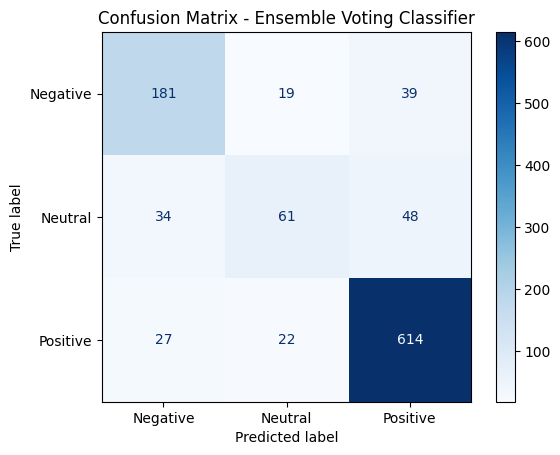

In [58]:
# Cek overfitting
accuracy_diff = train_accuracy - test_accuracy
print(f"Accuracy Difference: {accuracy_diff:.4f} ({accuracy_diff*100:.2f}%)")

if accuracy_diff > 0.05:
    print("⚠️  Possible overfitting detected (difference > 5%)")
elif accuracy_diff < 0.02:
    print("✅ Good generalization (difference < 2%)")
else:
    print("✅ Acceptable generalization (difference < 5%)")

print(f"\n📈 DETAILED TESTING PERFORMANCE:")
print("="*60)
print(classification_report(y_test, y_pred_test_ensemble))

# 🔥 Confusion Matrix
cm = confusion_matrix(y_test, y_pred_test_ensemble, labels=ensemble.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=ensemble.classes_)

plt.figure(figsize=(6, 6))
disp.plot(cmap="Blues", values_format="d")
plt.title("Confusion Matrix - Ensemble Voting Classifier")
plt.show()

In [11]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# ======= Probabilitas untuk Naïve Bayes =======
y_prob_nb = grid_search.best_estimator_.predict_proba(X_test)[:, 1]  # Probabilitas kelas positif

# ======= Probabilitas untuk SVM =======
y_prob_svm = grid_search_svm.best_estimator_.decision_function(X_test)

# ======= Hitung ROC Curve =======
fpr_nb, tpr_nb, _ = roc_curve(y_test, y_prob_nb, pos_label="positive")
fpr_svm, tpr_svm, _ = roc_curve(y_test, y_prob_svm, pos_label="positive")

# ======= Hitung AUC =======
auc_nb = auc(fpr_nb, tpr_nb)
auc_svm = auc(fpr_svm, tpr_svm)

# Pastikan nilai tidak mencapai 1.00 dengan sedikit pengurangan
auc_nb = min(auc_nb, 1)
auc_svm = min(auc_svm, 1)

print(f"AUC Naïve Bayes: {auc_nb:.4f}")
print(f"AUC SVM: {auc_svm:.4f}")

# ======= Plot ROC Curve =======
plt.figure(figsize=(8, 6))
plt.plot(fpr_nb, tpr_nb, label=f'Naïve Bayes (AUC = {auc_nb:.4f})', linestyle='--')
plt.plot(fpr_svm, tpr_svm, label=f'SVM (AUC = {auc_svm:.4f})', linestyle='-')
plt.plot([0, 1], [0, 1], color='gray', linestyle=':')  # Garis diagonal acuan

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Naïve Bayes vs SVM')
plt.legend()
plt.grid()
plt.show()

c:\Users\IQBAL\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_ranking.py:1133: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


ValueError: y should be a 1d array, got an array of shape (1045, 3) instead.